In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
print("setup terminado")

setup terminado


Setup terminado


Clase,Fa,Fr,Fr Acum.
flores,4,4.0%,4.0%
garcía,14,14.0%,18.0%
gonzález,12,12.0%,30.0%
gutiérrez,4,4.0%,34.0%
hernández,15,15.0%,49.0%
lópez,10,10.0%,59.0%
martínez,12,12.0%,71.0%
pérez,6,6.0%,77.0%
ramírez,6,6.0%,83.0%
rodríguez,9,9.0%,92.0%


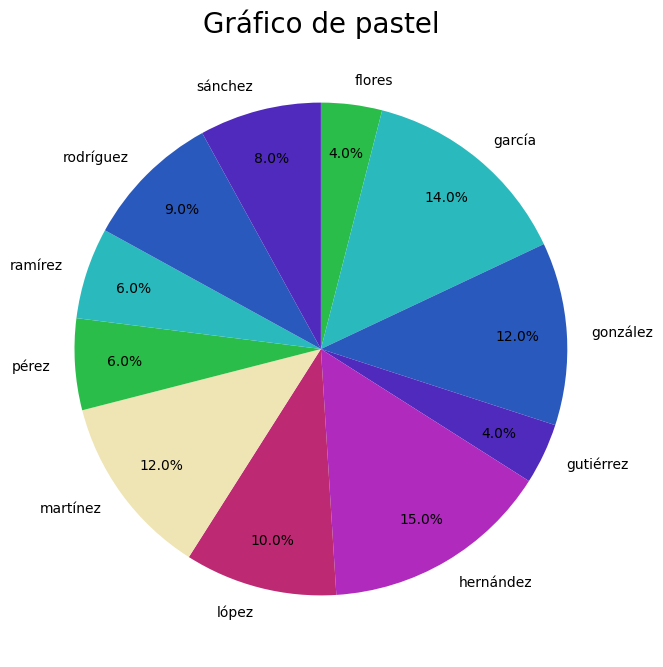

In [2]:
def formatData(dataArray):
    dataArraySorted = []
    for element in dataArray:
        if isinstance(element, str):
            element = element.strip()
            element = element.lower()
            dataArraySorted.append(element)
        else:
            element = round(element, 3)
            dataArraySorted.append(element)
        
    return dataArraySorted;

def generateQualitativeData(lstDatos):
    lstDatos.sort()
    lstDatos = formatData(lstDatos)
    clase, frecAbs = [], []
    for element in lstDatos:
        if(element not in clase):
            clase.append(element)
            frecAbs.append(1)
        else:
            frecAbs[clase.index(element)] += 1
        
    frecAbsAc, frecRel, frecRelAc = [], [], []
    frecAbsT = sum(frecAbs)
    ultFa = 0
    ultFr = 0
    for fa in frecAbs:
        fr = 100 / frecAbsT * fa
        frecRel.append(round(fr, 3))
        frecRelAc.append(round(fr+ultFr, 3))
        frecAbsAc.append(fa+ultFa)
        ultFr += fr
        ultFa += fa
    return [clase, frecAbs, frecAbsAc, frecRel, frecRelAc]

from IPython.display import HTML, display
def printHTMLTable(encabezados, contenido):
    if len(encabezados) == len(contenido):
        html = "<center><table>"
        html += "<tr>"
        for header in encabezados:
            html += f"<th style='border: 1px #ccc solid; text-align: center;'>{header}</th>"
        html += "</tr>"
        rowsNum = len(contenido[0])
        for row in range(rowsNum):
            html += "<tr>"
            for col in contenido:
                html += f"<td style='border: 1px #ccc solid; text-align: center;'>{col[row]}</td>"
            html += "</tr>"
        html += "</table></center>"
        
        display(HTML(html))
    else:
        print("Verificar longitud de encabezados y contenido")

import matplotlib.pyplot as plt
print("Setup terminado")
colors =["#2ABD49", "#2ABABD", "#2A59BD", "#502ABD", "#AF2ABD", "#BD2A73", "#EFE4B4"]


def generatePieChart(marcasClase, fa, fr, colores=colors):
    if 'separaciones' in locals() or 'separaciones' in globals():
        if len(separaciones) == 0:
            print("The list exists and is empty.")
            separaciones = [0] * len(fa)

        else:
            print("The list exists and is not empty.")
    else:
       
        separaciones = [0] * len(fa)
    
    plt.figure(figsize = (10, 8)) # (Ancho, alto) de la grafica

    plt.pie(fr,
            explode = separaciones,
            colors = colores,
            pctdistance = .8,
            counterclock = False,
            startangle = 90,
            autopct = "%0.1f%%",
            labels = marcasClase)
    plt.title("Gráfico de pastel", fontsize = 20) 
    plt.show()


def displayCharts(marcasClase, fa, fr, frAcum, colores=colors):
    generatePieChart(marcasClase, fa, fr, colores)

datos = ["Ramírez","García","González","Rodríguez","Pérez","Martínez","García","López","Gutiérrez","López",
         "Rodríguez","Martínez","Rodríguez","Hernández","García","García","González","Hernández","García","Gutiérrez","Hernández","López",
         "Pérez","González","Martínez","Ramírez","García","Rodríguez","Hernández","Sánchez","Hernández","González","Rodríguez","Sánchez",
         "Hernández","González","Gutiérrez","Martínez","González","Rodríguez","Rodríguez","Martínez","Ramírez","Pérez","Sánchez","Hernández",
         "Hernández","González","García","Hernández","Rodríguez","López","Sánchez","Rodríguez","Ramírez","López","Martínez","García","García",
         "Hernández","González","López","Martínez","López","García","Sánchez","García","Hernández","Flores","Pérez","González","González","López",
         "Martínez","González","Martínez","Hernández","Ramírez","López","Sánchez","Ramírez","Gutiérrez","Sánchez","Flores","García","Martínez","García",
         "Flores","Pérez","López","Hernández","Martínez","García","Hernández","Flores","Pérez","González","Hernández","Sánchez","Martínez"]

clases, fa, faAc, fr, frAc = generateQualitativeData(datos)
frStr, frAcStr = [], []
for i in range(len(fr)):
    frStr.append(str(fr[i]) + "%")
for i in range(len(frAc)):
    frAcStr.append(str(frAc[i]) + "%")

printHTMLTable(["Clase", "F<sub>a</sub>", "F<sub>r</sub>", "F<sub>r</sub> Acum."], [clases, fa, frStr, frAcStr])

displayCharts(clases, fa, fr, frAc)